In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
image_path = '/content/Image.jpg'

In [9]:
help(cv2.imread)

Help on built-in function imread:

imread(...)
    imread(filename[, flags]) -> retval
    .   @brief Loads an image from a file.
    .   
    .   @anchor imread
    .   
    .   The function imread loads an image from the specified file and returns it. If the image cannot be
    .   read (because of missing file, improper permissions, unsupported or invalid format), the function
    .   returns an empty matrix ( Mat::data==NULL ).
    .   
    .   Currently, the following file formats are supported:
    .   
    .   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
    .   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
    .   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
    .   -   Portable Network Graphics - \*.png (see the *Note* section)
    .   -   WebP - \*.webp (see the *Note* section)
    .   -   AVIF - \*.avif (see the *Note* section)
    .   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
    .   -   PFM 

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
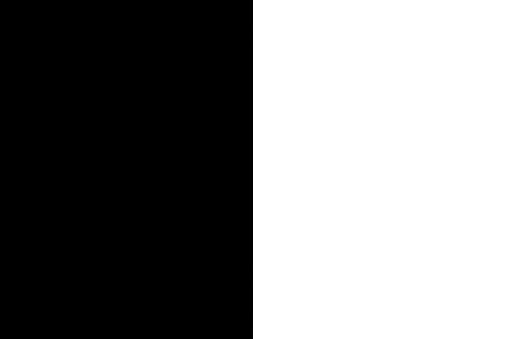

In [10]:
image  = cv2.imread(image_path)
#image = image.astype(np.float32)
image

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
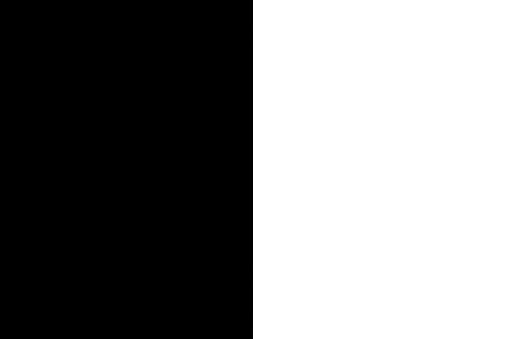

In [11]:
image

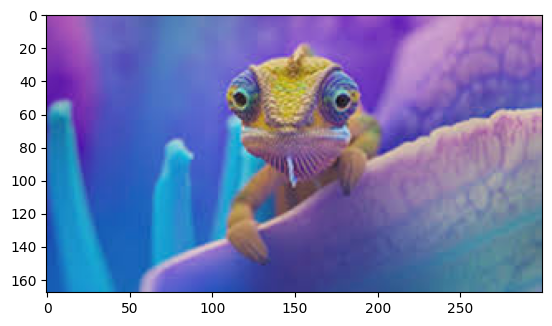

In [43]:
original_img = image2 = cv2.imread('/content/demo_img.jpeg')
plt.imshow(image2)
plt.show()

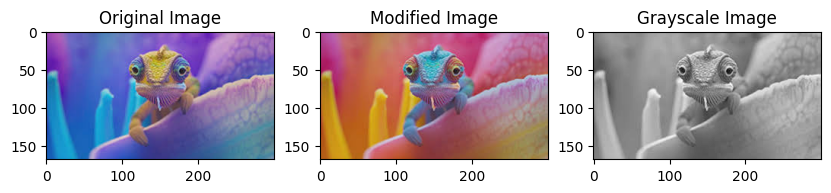

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(image2)
axes[0].set_title('Original Image')
axes[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[1].set_title('Modified Image')
axes[2].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY),cmap='gray')
axes[2].set_title('Grayscale Image')
plt.show()

In [25]:
sobel_vertical = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])
sobel_vertical

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [26]:
sobel_horizontal = sobel_vertical.T
sobel_horizontal

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [42]:
diag_45_kernel = np.array([[ 0,  1,  2],
                           [-1,  0,  1],
                           [-2, -1,  0]])

diag_135_kernel = np.array([[ 2,  1,  0],
                            [ 1,  0, -1],
                            [ 0, -1, -2]])

blurr_kernel =   np.array([[1/9, 1/9, 1/9],
                           [1/9, 1/9, 1/9],
                           [1/9, 1/9, 1/9]])


In [15]:
image.shape

(339, 509, 3)

In [16]:
rows, cols = image.shape[:2]
print(rows,cols)

339 509


In [17]:
k = sobel_vertical.shape[0]
k

3

In [18]:
output_matrix = np.zeros((rows-k+1, cols-k+1))
output_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
output_matrix = np.zeros((rows-2, cols-2))

for i in range(1, rows-1):
    for j in range(1, cols-1):
        region = image[i-1:i+2, j-1:j+2]  # Extracting 3x3 region
        output_matrix[i-1, j-1] = np.sum(region * sobel_vertical)

output_image = np.zeros((rows, cols))
output_image[1:rows-1, 1:cols-1] = output_matrix

In [20]:
output_image.shape


(339, 509)

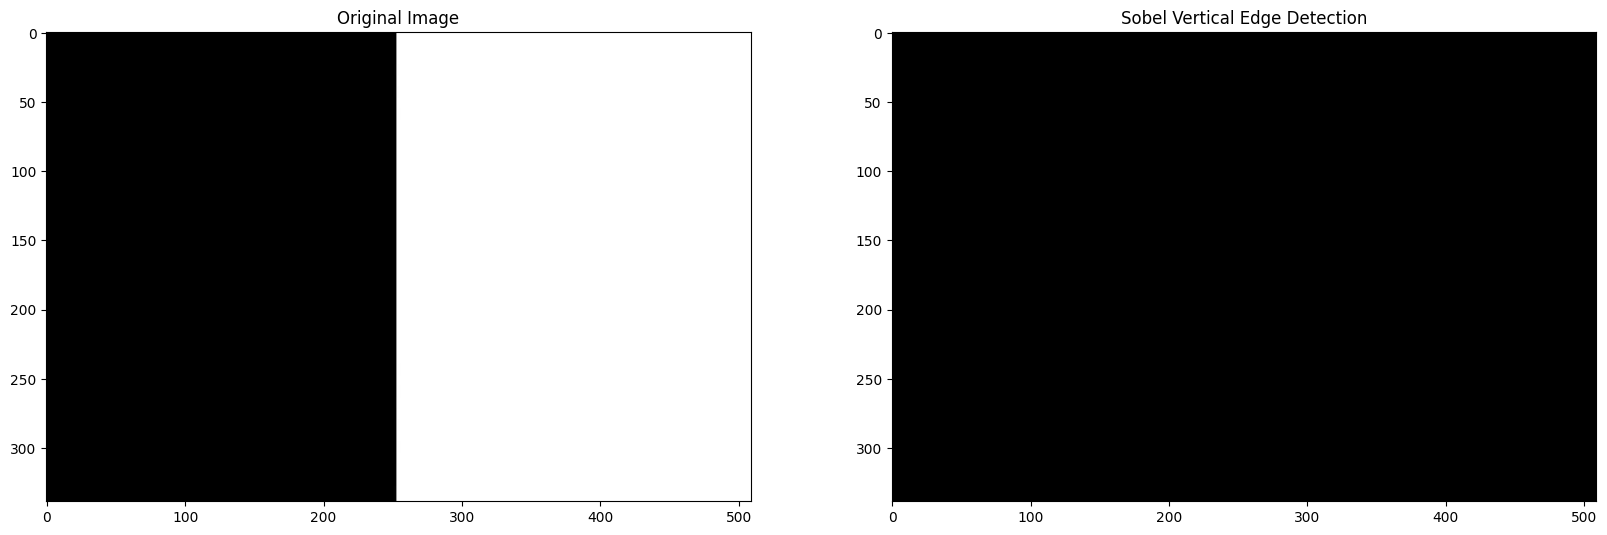

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(output_image,cmap='gray')
axes[1].set_title('Sobel Vertical Edge Detection')
plt.show()

the parameter -1 for the depth of the output image indicates that the depth of the output image should be the same as the depth of the source image.

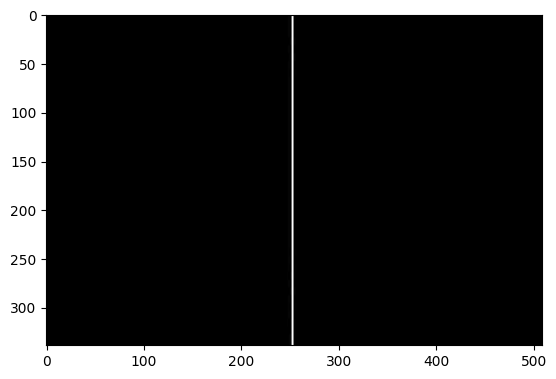

In [22]:
sobel_output = cv2.filter2D(image, -1, sobel_vertical)
plt.imshow(sobel_output)
plt.show()

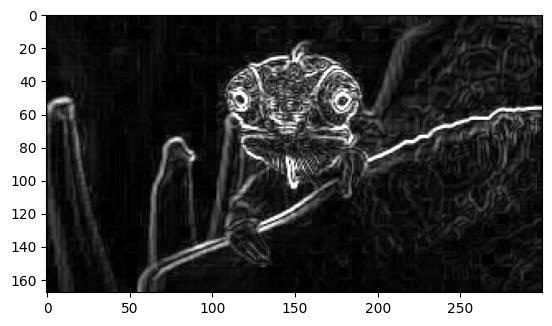

In [39]:
plt.imshow(image2,cmap='gray')

sobel_vertical_op = cv2.filter2D(image2,-1,sobel_vertical)
plt.imshow(sobel_vertical_op,cmap='gray')

sobel_horizontal_op = cv2.filter2D(image2,-1,sobel_horizontal)
plt.imshow(sobel_horizontal_op,cmap='gray')

diag_45_op = cv2.filter2D(image2,-1,diag_45_kernel)
plt.imshow(diag_45_op,cmap='gray')

diag_135_op = cv2.filter2D(image2,-1,diag_135_kernel)
plt.imshow(diag_135_op,cmap='gray')

edged_image_ = edged_image2 = np.maximum(sobel_vertical_op,sobel_horizontal_op)
edged_image2 = np.maximum(edged_image2,diag_45_op)
edged_image2 = np.maximum(edged_image2,diag_135_op)

plt.imshow(edged_image2,cmap='gray')

plt.show()


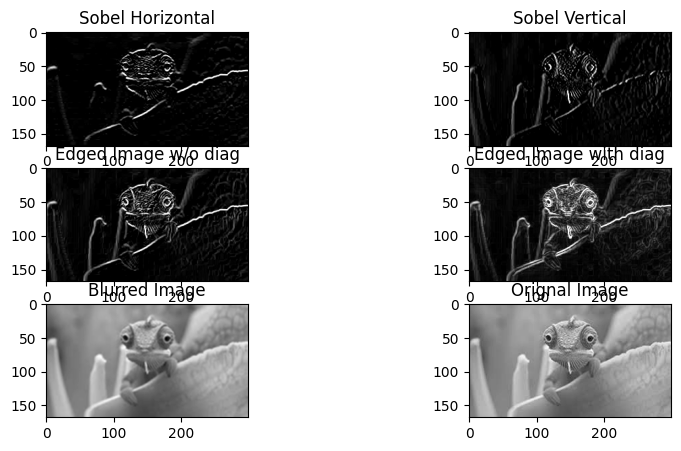

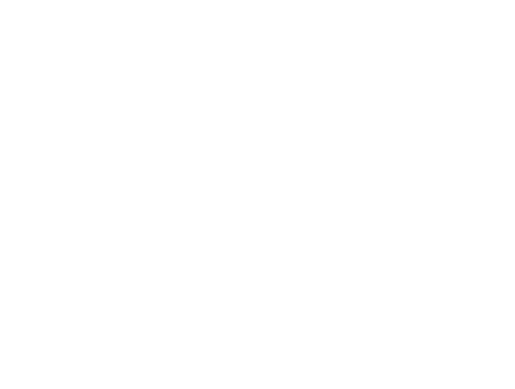

In [46]:
fig , axes = plt.subplots(3,2,figsize=(10,5))

axes[0,0].imshow(sobel_horizontal_op,cmap='gray')
axes[0,0].set_title('Sobel Horizontal')
axes[0,1].imshow(sobel_vertical_op,cmap='gray')
axes[0,1].set_title('Sobel Vertical')
axes[1,0].imshow(edged_image_,cmap='gray')
axes[1,0].set_title('Edged Image w/o diag')
axes[1,1].imshow(edged_image2,cmap='gray')
axes[1,1].set_title('Edged Image with diag')
axes[2,0].imshow(cv2.cvtColor(cv2.filter2D(original_img,-1,blurr_kernel),cv2.COLOR_BGR2GRAY),cmap='gray')
axes[2,0].set_title('Blurred Image')
axes[2,1].imshow(cv2.cvtColor(original_img,cv2.COLOR_BGR2GRAY),cmap='gray')
axes[2,1].set_title('Orignal Image')
plt.show()


plt.axis('off')
plt.show()